In [32]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
import pandas as pd
from collections import Counter
%matplotlib inline

# Загружаем датасет

In [4]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)
    
    

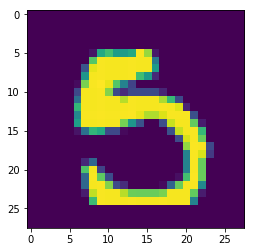

In [5]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][4].reshape(28,28))

# Обучаем модель

In [59]:
from sklearn.cross_validation import train_test_split

X = train['data'] # и двумя переменными
y = train['labels']
y[y==5] = -1 # конвертируем метки классов к 1/-1
y[y==6] = 1
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std + 0.000001)
x_train, x_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.25, random_state=10)

In [67]:
np.random.seed(10)
# добавляем единичную колонку для w0
X_train = np.hstack([ np.ones((x_train.shape[0], 1)), x_train] )
X_test = np.hstack([ np.ones((x_test.shape[0], 1)), x_test] )
# Инициализируем веса случайны образом
np.random.seed(10)
w_train = np.random.normal(scale=0.00013, size = X_train.shape[1])
loglos_train = []
otvet_train = []
w_test = np.random.normal(scale=0.00013, size = X_test.shape[1])
loglos_test = []
otvet_test = []

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

import tqdm

for iter in tqdm.tqdm_notebook(range(100)):
    for i in range(X_train.shape[0]):
        j = np.random.randint(0, X_train.shape[0])
        grad_train = - y_train[j] * X_train[j] / \
            ( 1 + math.exp( y_train[j] * np.dot(w_train.T, X_train[j]) ) ) + 0 * w_train
        w_train = w_train - 0.00013 * grad_train
    y_hat_train = np.dot(w_train, X_train.T)
    y_hat_train = [sigmoid(tmp) for tmp in y_hat_train]
    loglos_train.append(np.linalg.norm(y_train - y_hat_train, 2))
    otv = np.where(np.array(y_hat_train)<=0.5,-1,1)
    otvet_train.append(Counter(y_train == otv)[True]/len(otv)*100)
    
    
    for i in range(X_test.shape[0]):
        j = np.random.randint(0, X_test.shape[0])
        grad_test = - y_test[j] * X_test[j] / \
            ( 1 + math.exp( y_test[j] * np.dot(w_test.T, X_test[j]) ) ) + 0 * w_test
        w_test = w_test - 0.00013 * grad_test
    y_hat_test = np.dot(w_test, X_test.T)
    y_hat_test = [sigmoid(tmp) for tmp in y_hat_test]
    loglos_test.append(np.linalg.norm(y_test - y_hat_test, 2))
    otv = np.where(np.array(y_hat_test)<=0.5,-1,1)
    otvet_test.append(Counter(y_test == otv)[True]/len(otv)*100)

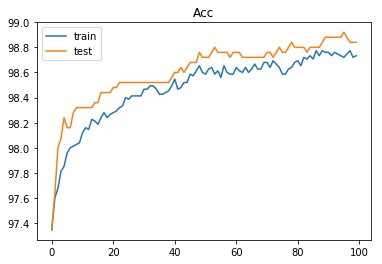

In [68]:
plt.title('Acc')
plt.plot(otvet_train, label='train')
plt.plot(otvet_test, label='test')
plt.legend()

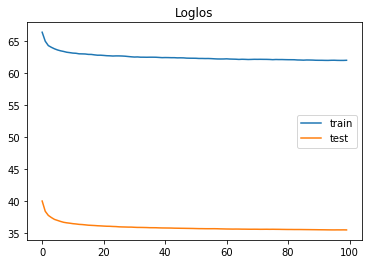

In [69]:
plt.title('Loglos')
plt.plot(loglos_train, label='train')
plt.plot(loglos_test, label='test')
plt.legend()

In [71]:
X = train['data'] # и двумя переменными
y = train['labels']
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std + 0.000001)
#X[np.isnan(X)] = 0

# добавляем единичную колонку для w0
np.random.seed(10)
X = np.hstack([ np.ones((X.shape[0], 1)), X] )

# Инициализируем веса случайны образом
np.random.seed(11)
w = np.random.normal(scale=0.00013, size = X.shape[1])

import tqdm

for iter in tqdm.tqdm_notebook(range(100)):
    for i in range(X.shape[0]):
        j = np.random.randint(0, X.shape[0])
        grad = - y[j] * X[j] / \
            ( 1 + math.exp( y[j] * np.dot(w.T, X[j]) ) ) + 0 * w
        w = w - 0.00013 * grad


def sigmoid(x):
  return 1 / (1 + math.exp(-x))

y_hat = [sigmoid(tmp) for tmp in y_hat]

In [72]:
X = test_no_lables['data']
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) /(std + 0.00001)
#X[np.isnan(X)] = 0


X = np.hstack([ np.ones((X.shape[0], 1)), X] )



y_hat = np.dot(w, X.T)
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

y_hat = [sigmoid(tmp) for tmp in y_hat]



# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [73]:
with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(y_hat)):
        print(i, y_hat[i], sep=',', file=fout)